The content is from the book `Information Theory, Inference and Learning Algorithms` by David MacKay, Cambridge Press, 2003.

#### With Uniform Prior

- We compare two models:
    1. $H_0$: the coin is fair
    1. $H_1$: the coin is biased, with the prior on its bias set to the uniform distribution $P(p|H_1)=1$. (It is biased, but we don't know $p$. So we simply assume that it is uniform.)

- Since any coin is surely biased to some extent, $H_0$ means that the coin is fair to within one part in a thousdad, i.e., $p \in 0.5 \pm 0.001$.

The Likelihood ratio is

   $\frac{P(D|H_1)}{P(D|H_0)} = 1 \bigg/ \bigg( \binom{250}{140} 0.5\times0.5\cdots0.5 \bigg) =  \frac{140! \; 110!}{250!} \big/ \frac{1}{2^{250}} = 0.48$
   
- $P(D|H_1)$ is the probability for collecting (140, 110) event outof 250 trials. It's probability for every event is 1.
- $P(D|H_0)$ is the probability for 250 independent events of 0.5 probability.
  

* The data give scarcely any evidence either way; in fact they give weak evidence (two to one) in favor of $H_0$!

### With Beta Distribution as Prior

In [6]:
from scipy.stats import beta
from matplotlib import pyplot as plt
import numpy as np

([<matplotlib.lines.Line2D at 0x1a1ffba160>],
 [<matplotlib.lines.Line2D at 0x1a1ffba668>])

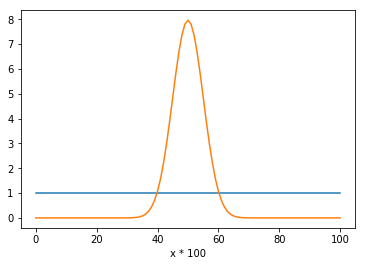

In [27]:
pdf_1 = [beta.pdf(i/100, 1, 1) for i in range(101)]
pdf_50 = [beta.pdf(i/100, 50, 50) for i in range(101)]
plt.xlabel('x * 100')
plt.plot (pdf_1), plt.plot(pdf_50)

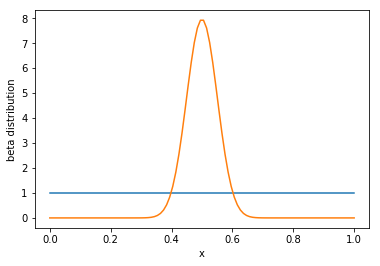

In [34]:
x = np.linspace (0, 1, 100)
pdf_0 = beta.pdf(x, 1, 1)
pdf_50 = beta.pdf(x, 50, 50)

plt.ylabel ('beta distribution')
plt.xlabel ('x')
plt.plot (x, pdf_0, x, beta.pdf(x,50,50))

In [38]:
mean, var, skew, kurt = beta.stats(50, 50, moments='mvsk')
print ('@ mean (peak) of Beta(50,50) = ', mean)

@ mean (peak) of Beta(50,50) =  0.5


#### The prior is now more restricted to the center point 0.5.

See the PDF illustrated above. When $\alpha=\beta=50$, the peak is at $x=0.5$ and very much narrow banded.

$P(D|H_0) = 1/Z(\alpha) \times p^{\alpha-1} (1-p)^{\alpha-1} \times \binom{250}{140} \times 0.5^{140} 0.5^{110}$

   $ = 1/Z' \times p^{\alpha + 140 - 1} \times (1-p)^{\alpha + 110 + 1} $

$Z' = \Gamma (\alpha + 140) \Gamma (\alpha + 110) \big/ \Gamma (2\alpha + 250)$

P(D | H_1) = 